In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [7]:
df = pd.read_csv("hypertension_dataset.csv")

In [8]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [10]:
df.shape

(1985, 11)

In [11]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [12]:
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [13]:
df['Has_Hypertension'].value_counts()

Has_Hypertension
Yes    1032
No      953
Name: count, dtype: int64

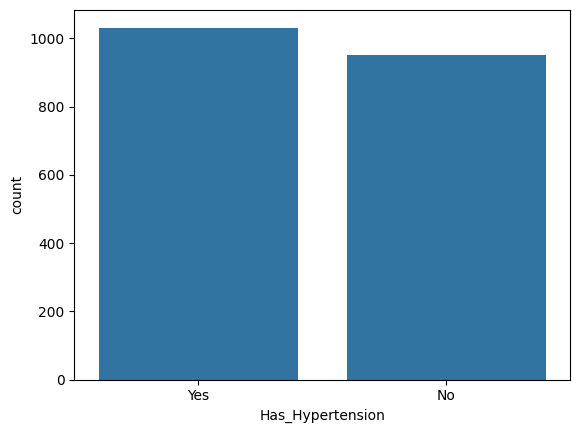

In [14]:
sns.countplot(x='Has_Hypertension',data=df)
plt.show()

In [15]:
cols = df.select_dtypes(include=['object']).columns
for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [16]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,4,1,1,0,1
1,32,11.7,10,1,5.4,23.4,4,0,1,0,0
2,78,9.5,3,1,7.1,18.7,4,0,2,0,0
3,38,10.0,10,0,4.2,22.1,0,0,1,0,1
4,41,9.8,1,2,5.8,16.2,3,0,2,0,0


In [17]:
X = df.drop('Has_Hypertension',axis =1)
Y = df['Has_Hypertension']

In [18]:
X

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status
0,69,8.0,9,1,6.4,25.8,4,1,1,0
1,32,11.7,10,1,5.4,23.4,4,0,1,0
2,78,9.5,3,1,7.1,18.7,4,0,2,0
3,38,10.0,10,0,4.2,22.1,0,0,1,0
4,41,9.8,1,2,5.8,16.2,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...
1980,56,10.2,0,1,6.5,25.0,2,1,1,0
1981,29,8.9,4,0,6.9,16.9,4,1,0,0
1982,64,5.9,9,1,5.6,18.9,0,1,2,0
1983,35,7.4,8,2,8.2,29.2,4,1,2,0


In [19]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
1980    1
1981    1
1982    1
1983    0
1984    0
Name: Has_Hypertension, Length: 1985, dtype: int64

In [20]:
X_train , X_test, Y_train, Y_test = train_test_split(X , Y , test_size= 0.2,random_state = 42)

In [21]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\nisha\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(X_test)

In [24]:
print("Accuracy:",accuracy_score(Y_test,y_pred))

Accuracy: 0.8085642317380353


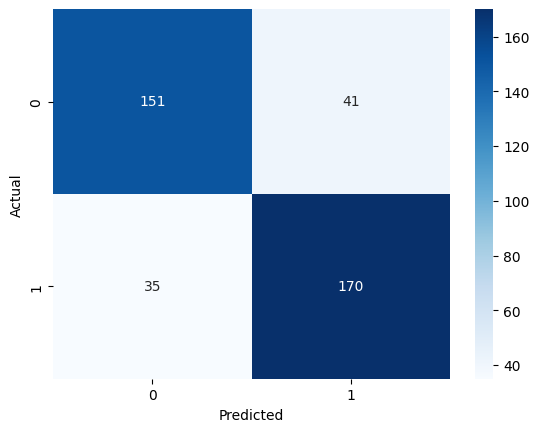

In [25]:
sns.heatmap(confusion_matrix(Y_test , y_pred), annot = True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,4,1,1,0,1
1,32,11.7,10,1,5.4,23.4,4,0,1,0,0
2,78,9.5,3,1,7.1,18.7,4,0,2,0,0
3,38,10.0,10,0,4.2,22.1,0,0,1,0,1
4,41,9.8,1,2,5.8,16.2,3,0,2,0,0


In [31]:
new_df = {
    "Age": 40,
    "Salt_Intake" : 9.5,
    "Stress_Score" : 7,
    "BP_History" : 1,
    "Sleep_Duration":5.7,
    "BMI": 18.9,
    "Medication": 4,
    "Family_History": 1,
    "Exercise_Level": 2,
    "Smoking_Status": 0
}

In [32]:
new = pd.DataFrame([new_df])

In [35]:
prediction = model.predict(new)

In [ ]:
print("Predicted Hypertension (0 = No, 1 = Yes) :"